# LSI - Latent Semantic Indexing

Czyli wykrycie w tekście znaczeń poprzez rozkład macierzy TfIdf przy użyciu SVD.

Wymiar danych tekstowych jest równy rozmiarowi słownika. Słowa są od siebie zależne (wystepowanie jak i ich kolejność). Warto zastanowić się nad redukcją wymiarowości.


# Zad (dla chętnych)
Wiemy że częste słowa to zwykle stopwordsy które warto usunąć. Można usunąć także rzadkie słowa. Proszę spróbować zrobić tak dla wybranej książki z nltk i zobaczyć jak zmniejszyła się wielkość słownika.

# Zad

Wykonajmy transformatę **Tf-Idf**

In [3]:
corpus = ["Romeo and Juliet",
         "Juliet: O happy dagger",
         "Romeo died by dagger",
         "'Live free or die', that’s the New-Hampshire’s motto",
         "Did you know, New-Hampshire is in New-England"]

query = ["dies", "dagger"]

In [4]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

def my_tokenizer(sent):
    tokens = word_tokenize(sent)
    stemmer = PorterStemmer()
    res = [stemmer.stem(word) for word in tokens]
    return res 


vectorizer = TfidfVectorizer(tokenizer=my_tokenizer, stop_words=stopwords.words('english') + list(string.punctuation))
vectorizer.fit(corpus)
print(vectorizer.vocabulary_)
tfidf_matrix = vectorizer.transform(corpus).todense()
print(tfidf_matrix.shape)
print(tfidf_matrix)


{'romeo': 10, 'juliet': 5, 'happi': 4, 'dagger': 1, 'die': 2, "'live": 0, 'free': 3, '’': 11, 'new-hampshir': 9, 'motto': 7, 'know': 6, 'new-england': 8}
(5, 12)
[[0.         0.         0.         0.         0.         0.70710678
  0.         0.         0.         0.         0.70710678 0.        ]
 [0.         0.53177225 0.         0.         0.659118   0.53177225
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.57735027 0.57735027 0.         0.         0.
  0.         0.         0.         0.         0.57735027 0.        ]
 [0.34706676 0.         0.28001128 0.34706676 0.         0.
  0.         0.34706676 0.         0.28001128 0.         0.69413353]
 [0.         0.         0.         0.         0.         0.
  0.61418897 0.         0.61418897 0.49552379 0.         0.        ]]


# Zad 
Ograniczmy się do 2 pierszych komponentów i narysujmy na płaszczyźnie nasze **zdania**.

In [5]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2) 
svd.fit(tfidf_matrix)

docs_red = svd.transform(tfidf_matrix) 

docs_red # przeanalizujemy podobienstwo

array([[ 0.7837973 , -0.14464289],
       [ 0.71446947, -0.16344513],
       [ 0.76523246,  0.09759731],
       [ 0.17293299,  0.76587814],
       [ 0.0323669 ,  0.71112885]])

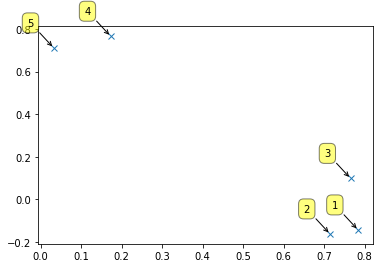

In [6]:
import matplotlib.pyplot as plt


plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = [1,2,3,4,5]
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

Jeśli nawet dokumenty nie mają wspólnych słów to mogą znaleźć się blisko siebie w zredukowanej przestrzeni (jeśli tylko mają coś wspólnego z trzecim dokumentem).

# Zad 
W zredukowanej przestrzeni można również zaznaczyć query a nawet pojedyncze słowa. Wystarczy potraktować słowo jako dokument i zrzutować. Proszę zaznaczyć słowa.

In [7]:
query = ["dies", "dagger"]
query_red = svd.transform( vectorizer.transform(query).todense() ) 
print(query_red)

[[ 0.28152494  0.23559612]
 [ 0.47190249 -0.02659373]]


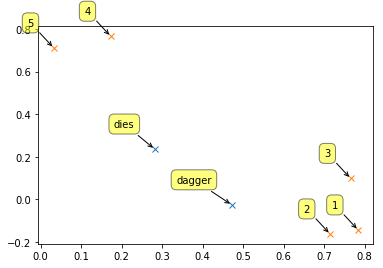

In [8]:

plt.plot(query_red[:, 0], query_red[:, 1], 'x')
plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = [1,2,3,4,5]
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
labels = ["dies", "dagger"]
for label, x, y in zip(labels, query_red[:, 0], query_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

# Zad
Można też zaznaczyć wszystkie słowa z korpusu

# Wstęp do modelowania tematów

Co tak naprawdę opisują nasze kierunki? Są to pewne kombinacje słów (atrybutów). Im większy współczynnik przy słowie tym ważniejsze słowo. 

Kierunki będziemy traktować jako tematy, które charakteryzują się pewnymi słowami


# Zad. (wypada jeszcze posortować) 
Proszę wypisać słowa i ich wagi dla danego kierunku w kolejności malejącej. 

* Robimy ręcznie rozkład SVD
* Wagi słów znajdują się w kolejnych współrzędnych wektorów własnych (components_)

In [15]:
A = (vectorizer.transform(corpus)).todense()
print(A)

import numpy as np 
print(A)
U,s,VT = np.linalg.svd(A)
print(s)

[[0.         0.         0.         0.         0.         0.70710678
  0.         0.         0.         0.         0.70710678 0.        ]
 [0.         0.53177225 0.         0.         0.659118   0.53177225
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.57735027 0.57735027 0.         0.         0.
  0.         0.         0.         0.         0.57735027 0.        ]
 [0.34706676 0.         0.28001128 0.34706676 0.         0.
  0.         0.34706676 0.         0.28001128 0.         0.69413353]
 [0.         0.         0.         0.         0.         0.
  0.61418897 0.         0.61418897 0.49552379 0.         0.        ]]
[[0.         0.         0.         0.         0.         0.70710678
  0.         0.         0.         0.         0.70710678 0.        ]
 [0.         0.53177225 0.         0.         0.659118   0.53177225
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.57735027 0.57735027 0.         0.         0.
  0.

In [17]:
#wypiszmy z czego składają się poszczególne kierunki


# print(corpus)
# print(vectorizer.vocabulary_)
# print(VT)
n_elements = 2
for i in range(n_elements):
    s = ""
    for val in vectorizer.vocabulary_:
#         print(val, " ",words_red[i,vectorizer.vocabulary_[val]], " ", i)
        s = s + val + "*" + str(VT[i,vectorizer.vocabulary_[val]]) + " + " 
    print("-------")
    print(s)
    print()
# print(vectorizer.vocabulary_.keys())
# print(vectorizer.vocabulary_.values())

-------
romeo*-0.5719940579364199 + juliet*-0.5364627090685581 + happi*-0.2704353932634657 + dagger*-0.4719024938383854 + die*-0.28152494125131045 + 'live*-0.03446732389948646 + free*-0.03446732389948636 + ’*-0.06893464779897274 + new-hampshir*-0.03701849964280702 + motto*-0.03446732389948637 + know*-0.011416152239167221 + new-england*-0.011416152239167221 + 

-------
romeo*0.039958891153991434 + juliet*0.1645970476390291 + happi*0.09372401070355682 + dagger*0.026593726917503144 + die*-0.2355961199665075 + 'live*-0.231253546447042 + free*-0.23125354644704194 + ’*-0.46250709289408387 + new-hampshir*-0.4931430996876587 + motto*-0.23125354644704194 + know*-0.37998461462891564 + new-england*-0.37998461462891564 + 

